Applied Machine Learning: Module 3 (Evaluation)

Evaluation for Classification 
Preamble

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target
#print(np.bincount(dataset.target))
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
print("Original labels :\t", y[1:30])
print("New binary labels :\t", y_binary_imbalanced[1:30])

Original labels :	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels :	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
for class_name, class_count in zip(np.unique(y_binary_imbalanced), np.bincount(y_binary_imbalanced)):
    print(class_name, class_count)


0 1615
1 182


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

Dummy Classifier

In [5]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions[1:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

Confusion matrices
Binary (two-class) confustion matrix

In [8]:
from sklearn.metrics import confusion_matrix
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)
print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)
print('Random class-proportional prediction (dummy classifier) \n', confusion)

Random class-proportional prediction (dummy classifier) 
 [[360  47]
 [ 40   3]]


In [10]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print('Support vactor machine classifier (linear kernel, C = 1)\n', confusion)

Support vactor machine classifier (linear kernel, C = 1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion_matrix = confusion_matrix(y_test, tree_predicted)
print('Decision tree classifier (max_depth = 2) \n', confusion)

Decision tree classifier (max_depth = 2) 
 [[402   5]
 [  5  38]]


Evaluation metrics for binary classification

In [12]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print("Accuracy: {:.2f}".format(accuracy_score(y_test, tree_predicted)))

Accuracy: 0.95


In [13]:
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))

Precision: 0.79


In [14]:
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))

Recall: 0.60


In [15]:
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

F1: 0.68


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [17]:
print('Random class-proportional (dummy) \n', classification_report(y_test, y_classprop_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy) 
               precision    recall  f1-score   support

       not 1       0.90      0.88      0.89       407
           1       0.06      0.07      0.06        43

   micro avg       0.81      0.81      0.81       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.81      0.81       450



In [18]:
print('SVM\n', classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
#print('Logistic Regression \n', classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision Tree \n', classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

   micro avg       0.98      0.98      0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Decision Tree 
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



Decision functions

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression().fit(X_train, y_train)
logistic_predicted = LogisticRegression().fit(X_train, y_train).predict(X_test)
confusion = confusion_matrix(y_test, logistic_predicted )

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Decision functions

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))
y_proba_list

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 8.649914078868219e-11),
 (0, 1.3158126286243035e-06),
 (0, 3.696689883353834e-10),
 (0, 6.173372468198197e-09),
 (0, 2.7082405211646893e-09),
 (0, 5.842963762979811e-05),
 (1, 0.9947016706742451),
 (0, 4.107143992825214e-09),
 (0, 1.2619733897929706e-11),
 (0, 3.3223136379213224e-10),
 (0, 3.2432739177225284e-11),
 (0, 3.146875397559668e-09),
 (0, 1.5796332879748914e-10),
 (0, 1.984583389607351e-05),
 (0, 6.6945688566289126e-06),
 (0, 1.7069516901045985e-05),
 (1, 0.9999864382844827),
 (0, 9.76519123035378e-13),
 (0, 2.5849720695693154e-06),
 (0, 5.908291631682226e-12)]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = sorted(list(zip(y_test[0:20], y_scores_lr[0:20])), key = lambda y: y[1])
y_scores_lr[0:20]

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([-23.17088664, -13.5410548 , -21.71841314, -18.90302055,
       -19.72696666,  -9.74762887,   5.23505131, -19.31053794,
       -25.09575934, -21.82518951, -24.15185273, -19.57685581,
       -22.56865821, -10.82749661, -11.91420728, -10.97819925,
        11.20824621, -27.65478206, -12.86579327, -25.85466439])

Precision-recall curves

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


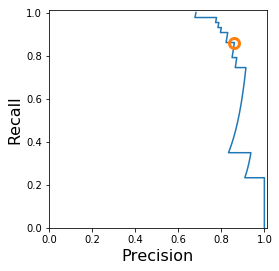

In [23]:
plt.figure()

plt.plot(precision, recall, label = 'Precision-Recall curve')
plt.gca().set_ylim([0.0,1.01])
plt.gca().set_xlim([0.0,1.01])
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = '10', fillstyle = 'none', mew = 3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

ROC curves, Area-Under-Curve (AUC)

In [24]:
from sklearn.metrics import auc, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr , tpr_lr , _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


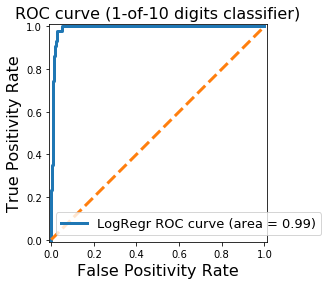

In [25]:
plt.figure()
plt.gca().set_xlim([-0.01, 1.01])
plt.gca().set_ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw =3, label = 'LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positivity Rate', fontsize = 16)
plt.ylabel('True Positivity Rate', fontsize = 16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize = 16)
plt.legend(loc = 'best', fontsize = 13)
plt.plot([0, 1], [0, 1], lw = 3, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01 accuracy = 0.91 AUC = 1.00
gamma = 0.10 accuracy = 0.90 AUC = 0.98
gamma = 0.20 accuracy = 0.90 AUC = 0.66
gamma = 1.00 accuracy = 0.90 AUC = 0.50


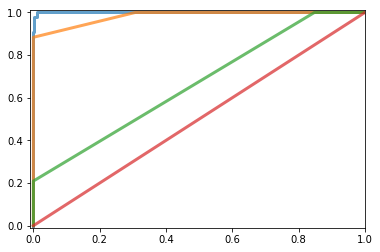

In [26]:
from matplotlib import cm
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma = g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm =svm.score(X_test, y_test)
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(g, accuracy_svm, roc_auc_svm))
    
    plt.plot(fpr_svm, tpr_svm, lw = 3, alpha = 0.7, label = 'SVM (gamm)')

Evaluation measures for multi-class classification
Multi-class confusion matrix

Text(0.5, 15.0, 'Predicted label')

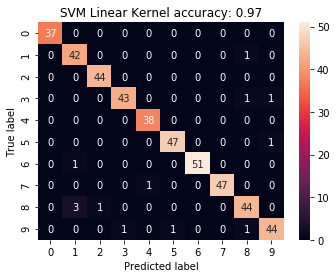

In [27]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state = 0)
svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot = True)
plt.title('SVM Linear Kernel accuracy: {:.2f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted label')

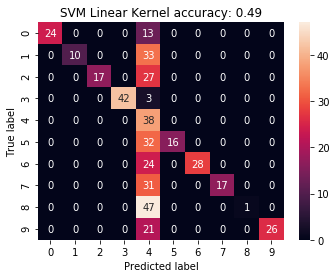

In [28]:
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0, 10)], columns = [i for i in range(0, 10)])
plt.figure(figsize = (5.5, 4))
sns.heatmap(df_cm, annot = True)
plt.title('SVM Linear Kernel accuracy: {:.2f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

Multi-class classification report

In [29]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

   micro avg       0.49      0.49      0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



In [30]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'.format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'.format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [31]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'.format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'.format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


Regression evaluation metrics

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()
X = diabetes.data[:,None, 6]
X.shape

(442, 1)

Linear model, coefficients : [-698.80206267]
Mean Squared Error (linear model): 4646.74
Mean Squared Error (dummy): 4965.13
r2_score (dummy): -0.00
r2_score (linear model): 0.06


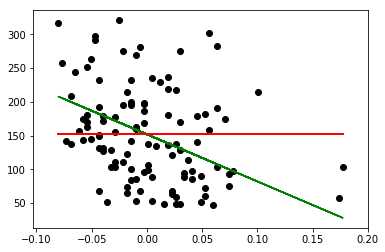

In [33]:
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
print('Linear model, coefficients :', lm.coef_)
print('Mean Squared Error (linear model): {:.2f}'.format(mean_squared_error(y_test, y_predict)))
print('Mean Squared Error (dummy): {:.2f}'.format(mean_squared_error(y_test, y_predict_dummy_mean)))
print('r2_score (dummy): {:.2f}'.format(r2_score(y_test, y_predict_dummy_mean)))
print('r2_score (linear model): {:.2f}'.format(r2_score(y_test, y_predict)))
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_predict, color = 'green')
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

Model selection using evaluation metrics
Cross-validation example

In [34]:
from sklearn.model_selection import cross_val_score
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel = 'linear', C = 1)
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv = 5))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv = 5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


Grid search example

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = SVC(kernel = 'rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918


In [37]:
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_auc.fit(X_train, y_train)
y_decison_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Test set AUC: ', roc_auc_score(y_test, y_decison_fn_scores_auc))
print('Grid best parameter (max. AUC):', grid_clf_auc.best_params_)
print('Grid best score (accuracy): ', grid_clf_auc.best_score_)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC:  0.99982858122393
Grid best parameter (max. AUC): {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918


Evaluation metrics supported for model selection

In [38]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


Two-feature classification example using the digits dataset

Optimizing a classifier using different evaluation metrics

In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape[0]

1347

In [41]:
jitter_delta =  0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:,[20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

In [43]:
#X_twovar_test

In [50]:
clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize = (9,6))
for i, eval_metric in enumerate(('precision', 'recall', 'f1', 'roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid = grid_values, scoring = eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score (max. {0}): {1}'.format(eval_metric, grid_clf_custom.best_score_))

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (max. precision): 0.531851331340392


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (max. recall): 0.9356451826685813


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (max. f1): 0.5055381337941618


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. roc_auc): {'class_weight': {1: 20}}
Grid best score (max. roc_auc): 0.8891369548940101


<Figure size 648x432 with 0 Axes>

Precision-recall curve for the default SVC classifier (with balanced class weight)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
#from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


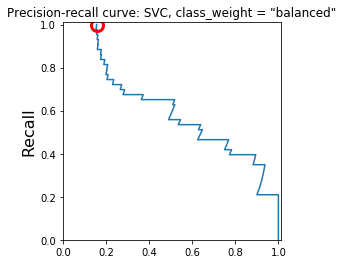

At zero threshold, precision: 0.16, recall: 1.00


In [54]:
clf = SVC(kernel = 'linear', class_weight = 'balanced').fit(X_twovar_train, y_train)
y_scores = clf.decision_function(X_twovar_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.argmin(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('Precision-recall curve: SVC, class_weight = "balanced"')
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))